<a href="https://colab.research.google.com/github/MEROO1010/Iris-Flower-Classification/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Dependencies and Setup**

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Iris dataset**

In [10]:
iris = load_iris()
data = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

# **Split the data into features and labels**


In [11]:
X = data[iris['feature_names']]

In [12]:
y = data['target']

# **Split the data into training and testing sets**


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Initialize the classifier**

In [14]:
clf = RandomForestClassifier(random_state=42)


# **Train the classifier**

In [15]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Make predictions**

In [16]:
y_pred = clf.predict(X_test)

## **Evaluate the model**

In [17]:
accuracy = accuracy_score(y_test, y_pred)

In [18]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [19]:
print("\nClassification Report:")


Classification Report:


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## **Confusion Matrix**

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [22]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

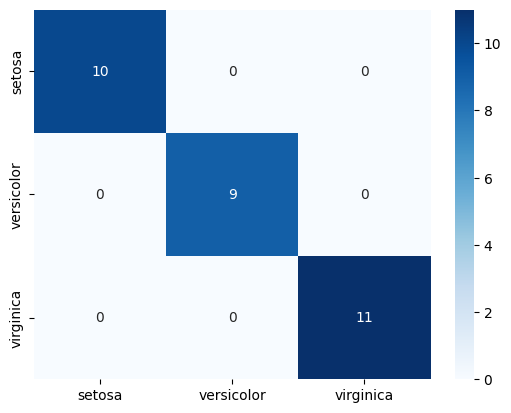

In [23]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris['target_names'], yticklabels=iris['target_names'])

Text(0.5, 0, 'Predicted')

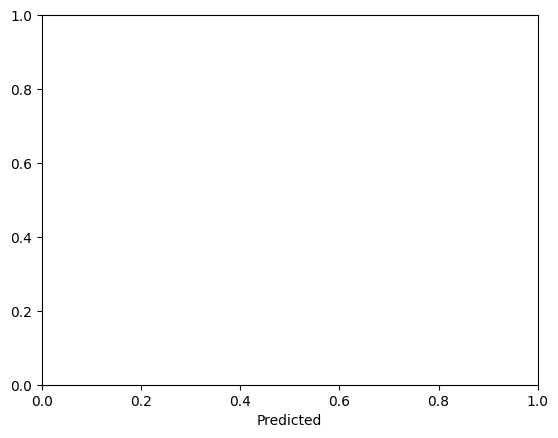

In [24]:
plt.xlabel('Predicted')

Text(0, 0.5, 'Actual')

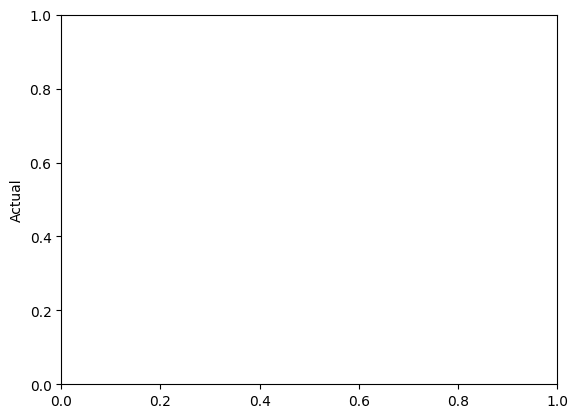

In [25]:
plt.ylabel('Actual')

Text(0.5, 1.0, 'Confusion Matrix')

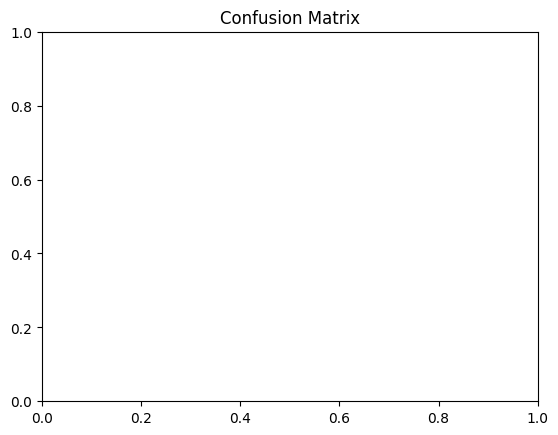

In [26]:
plt.title('Confusion Matrix')

In [28]:
plt.show()

## **Feature Importance**

In [29]:
feature_importances = pd.DataFrame({
    'Feature': iris['feature_names'],
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [30]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


## **Plot Feature Importances**

In [31]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<ipython-input-32-e82d23b2451e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


<Axes: xlabel='Importance', ylabel='Feature'>

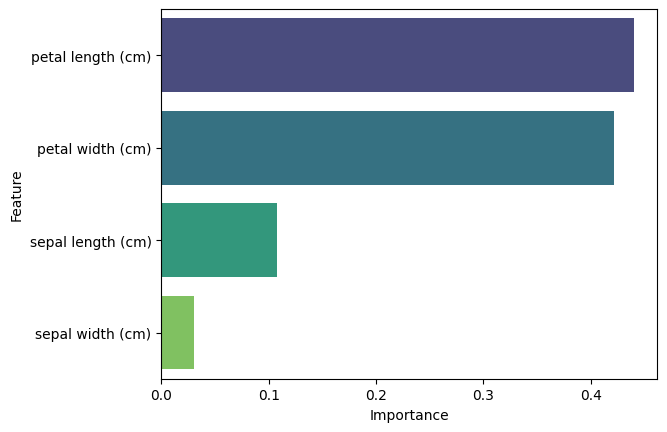

In [32]:
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


Text(0.5, 1.0, 'Feature Importances')

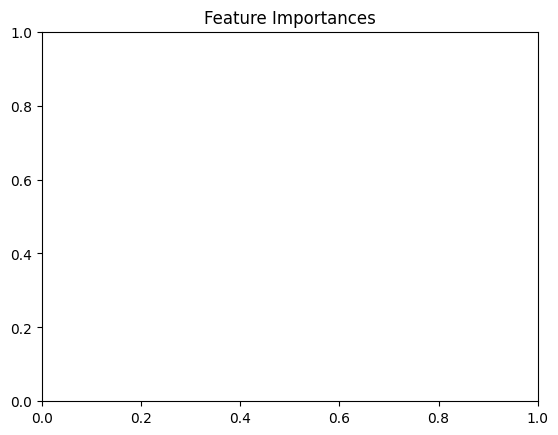

In [33]:
plt.title('Feature Importances')

In [34]:
plt.show()
